# Import Packages|

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset

In [ ]:
df = pd.read_csv('creditcard.csv')
plt.style.use("ggplot")
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

# 2. Split features and target

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


In [15]:
df.shape
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


Quick schema check

In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Missing-value scan

<Axes: title={'center': 'Missing values per column'}>

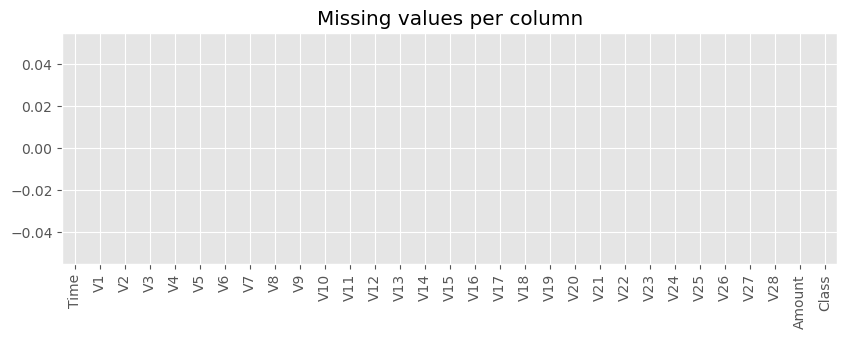

In [17]:
df.isnull().sum().plot.bar(figsize=(10,3), title="Missing values per column")

Target-class distribution

Class
0    284315
1       492
Name: count, dtype: int64
Class
0   0.9983
1   0.0017
Name: count, dtype: float64


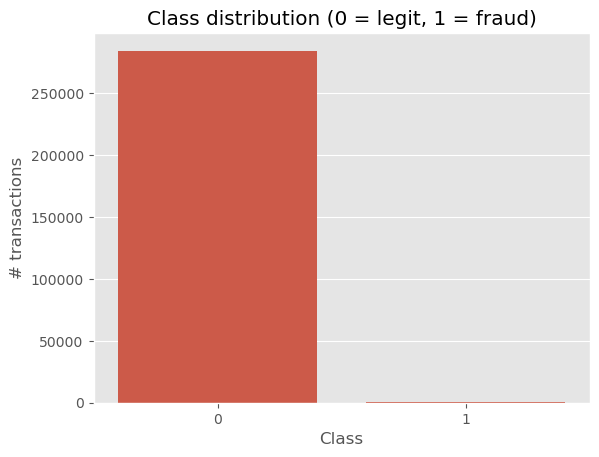

In [ ]:
target_counts = df["Class"].value_counts()
target_ratio  = target_counts / len(df)

print(target_counts)
print(target_ratio)

sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class distribution (0 = legit, 1 = fraud)")
plt.ylabel("# transactions")
plt.show()

Finding Missing Values in Dataset

<Axes: title={'center': 'Missing values per column'}>

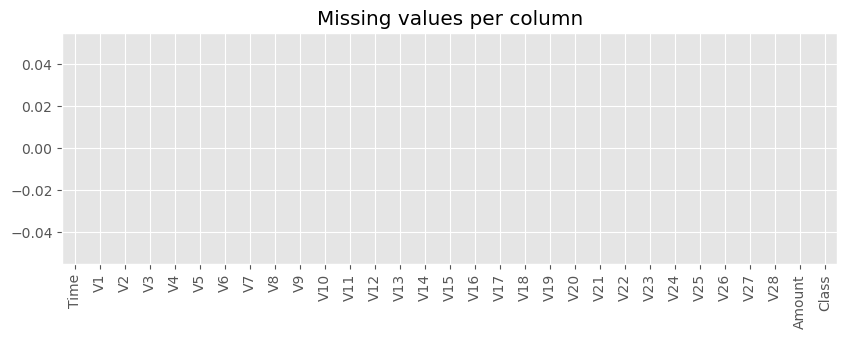

In [19]:
df.isnull().sum().plot.bar(figsize=(10,3), title="Missing values per column")

Numeric-feature distributions

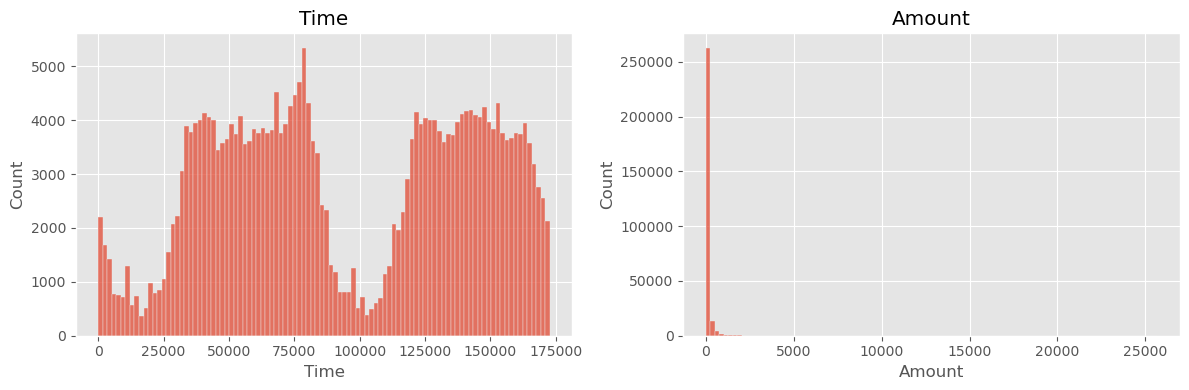

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df["Time"],  bins=100, ax=axes[0]);   axes[0].set_title("Time")
sns.histplot(df["Amount"], bins=100, ax=axes[1]);  axes[1].set_title("Amount")
plt.tight_layout()

In [22]:
df.filter(regex="^V").describe().T[["mean", "std", "min", "max"]].head()

,mean,std,min,max
V1,0.0000,1.9587,-56.4075,2.4549
V2,0.0000,1.6513,-72.7157,22.0577
V3,-0.0000,1.5163,-48.3256,9.3826
V4,0.0000,1.4159,-5.6832,16.8753
V5,0.0000,1.3802,-113.7433,34.8017


Correlation analysis

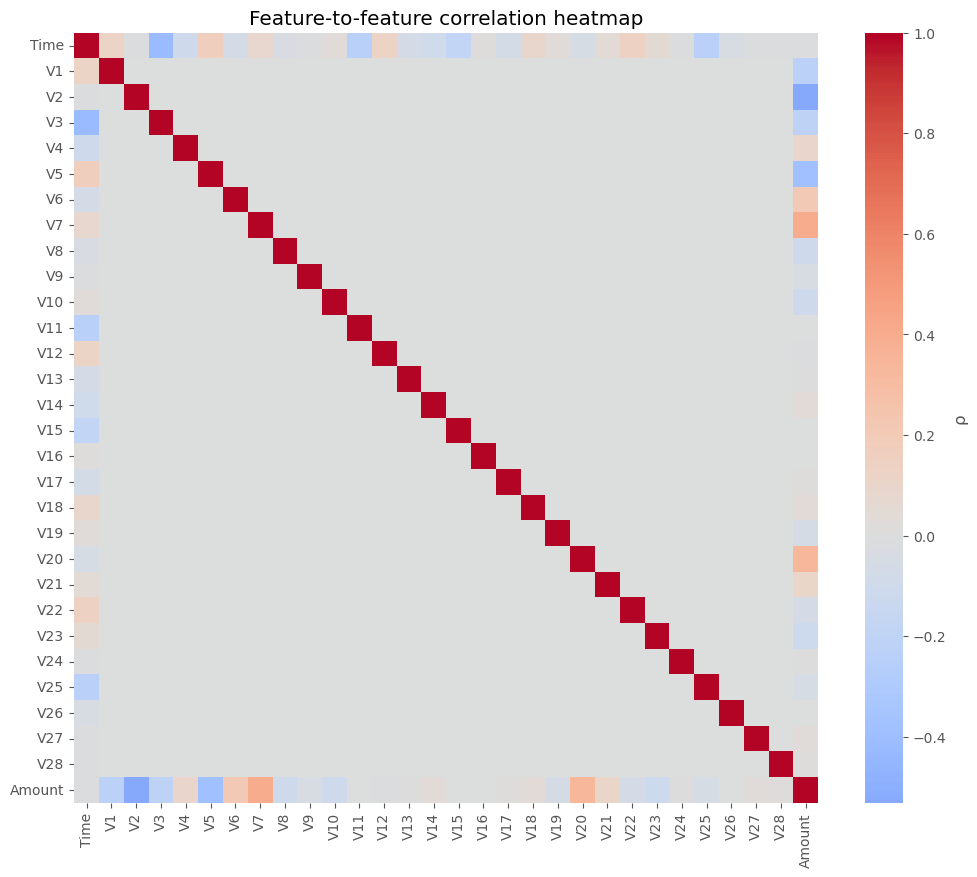

In [23]:
corr = df.drop(columns="Class").corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, cbar_kws={"label":"ρ"})
plt.title("Feature-to-feature correlation heatmap")
plt.show()


Feature - Target Correlation

In [24]:
target_corr = df.corr()["Class"].abs().sort_values(ascending=False)
target_corr.head(10)

Class   1.0000
V17     0.3265
V14     0.3025
V12     0.2606
V10     0.2169
V16     0.1965
V3      0.1930
V7      0.1873
V11     0.1549
V4      0.1334
Name: Class, dtype: float64

# 3. Train-test split with stratification

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
# 4. Preprocessing & Sampling pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Feature scaling
    ('smote', SMOTE(random_state=42)), # Oversample minority class
    ('clf', LogisticRegression(        # Train logistic regression
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

In [6]:
# 5. Train the model
pipeline.fit(X_train, y_train)

c:\Users\veyni\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [7]:
# 6. Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [8]:
# 7. Evaluation: precision, recall, f1-score, and AUC-ROC
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0578    0.9184    0.1088        98

    accuracy                         0.9741     56962
   macro avg     0.5288    0.9463    0.5478     56962
weighted avg     0.9982    0.9741    0.9854     56962

ROC AUC Score: 0.9708434302252134


In [11]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [12]:
y_pred_default = (y_proba >= 0.5).astype(int)
print("=== Default threshold (0.5) ===")
print(classification_report(y_test, y_pred_default, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

=== Default threshold (0.5) ===
              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0578    0.9184    0.1088        98

    accuracy                         0.9741     56962
   macro avg     0.5288    0.9463    0.5478     56962
weighted avg     0.9982    0.9741    0.9854     56962

ROC AUC: 0.9708434302252134
